## Understanding image read libraries

In [1]:
import numpy as np

# image read libraries
from PIL import Image
import cv2
import matplotlib.pyplot as plt 
import skimage
from skimage import io

img_dir = 'doge.jpg'

### Understand the type and shape

In [2]:
# matplotlib
print('plt.imread()')
img1 = plt.imread(img_dir)
print(type(img1))#np.array
print(img1.shape)
print('\n')

# opencv 
print('cv2.imread()')
img2=cv2.imread(img_dir)
print(type(img2))
print(img2.shape)
print('\n')

# PIL
print('Image.open()')
img3=Image.open(img_dir)
print(type(img3)) # PIL.JpegImagePlugin.JpegImageFile object
img3=np.array(img3)# convert to np array
print(type(img3))
print(img3.shape)
print('\n')

# skimge 
print('io.imread()')
img4 = io.imread(img_dir)
print(type(img4))#np.array
print(img4.shape)

plt.imread()
<class 'numpy.ndarray'>
(540, 959, 3)


cv2.imread()
<class 'numpy.ndarray'>
(540, 959, 3)


Image.open()
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>
(540, 959, 3)


io.imread()
<class 'numpy.ndarray'>
(540, 959, 3)


### Colour Channel

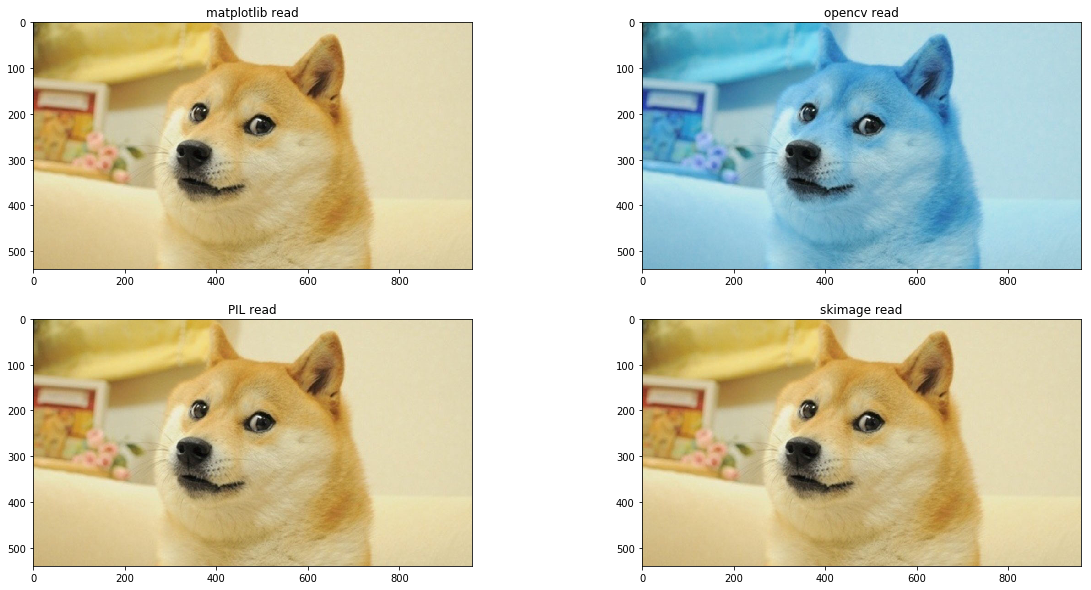

In [3]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.title('matplotlib read')  # RGB
plt.imshow(img1)
plt.subplot(222)
plt.title('opencv read')  # BGR
plt.imshow(img2)
plt.subplot(223)
plt.title('PIL read')  # RGB
plt.imshow(img3)
plt.subplot(224)
plt.title('skimage read')  # RGB
plt.imshow(img4)
plt.show()

### Switch of opencv colour channels
Since opencv colour channels are in BGR instead of RGB, so conversion is needed if you plot the image in plt.

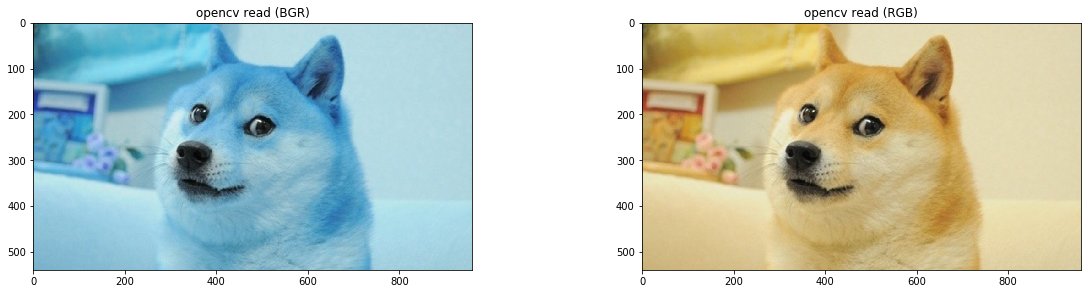

In [4]:
# opencv 
img2=cv2.imread(img_dir)

#BGR ->RGB
new_img = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.title('opencv read (BGR)')
plt.imshow(img2)
plt.subplot(222)
plt.title('opencv read (RGB)')
plt.imshow(new_img)


#### Reminder
https://stackoverflow.com/questions/50963283/python-opencv-imshow-doesnt-need-convert-from-bgr-to-rgb/50963621

BGR and RGB are not color spaces, they are just conventions for the order of the different color channels. `cv2.cvtColor`(img, `cv2.COLOR_BGR2RGB`) doesn't do any computations (like a conversion to say HSV would), it just switches around the order. Any ordering would be valid - in reality, the three values (red, green and blue) are stacked to form one pixel. You can arrange them any way you like, as long as you tell the display what order you gave it.

OpenCV `imread`, `imwrite` and `imshow` indeed all work with the BGR order, so there is no need to change the order when you read an image with `cv2.imread` and then want to show it with `cv2.imshow`.

While BGR is used consistently throughout OpenCV, most other image processing libraries use the RGB ordering. If you want to use `matplotlib`'s `imshow` but read the image with OpenCV, you would need to convert from BGR to RGB.

### Efficiency

Based on the load image time, PIL is the most efficient library.

In [7]:
import time
def test_read_image(imgfile, func):
    t0 = time.time()
    img = func(imgfile)
    return img, time.time() - t0

In [8]:
img1, t1 = test_read_image(img_dir, plt.imread)
print('plt.imread :', t1, ', shape : ', img1.shape)

plt.imread : 0.022546768188476562 , shape :  (540, 959, 3)


In [9]:
img2, t2 = test_read_image(img_dir, cv2.imread)
print('cv2.imread :', t2, ', shape : ', img2.shape)

cv2.imread : 0.010960102081298828 , shape :  (540, 959, 3)


In [10]:
img3, t3 = test_read_image(img_dir, Image.open)
print('Image.open :', t3, ', size : ', img3.size, ', mode: ', img3.mode,)

Image.open : 0.0016620159149169922 , size :  (959, 540) , mode:  RGB


In [11]:
img4, t4 = test_read_image(img_dir, io.imread)
print('io.imread :', t4, ', shape : ', img4.shape)

io.imread : 0.014626026153564453 , shape :  (540, 959, 3)


In [12]:
# Source
# https://github.com/ZhangXinNan/LearnPractice/blob/master/cv/opencv/test_cvlib.py
# https://blog.csdn.net/renelian1572/article/details/78761278